## 1. Đọc file ngữ liệu đã thu thập được

In [28]:
f = open('data/corpus.txt', 'r', encoding='utf-8')
data = [line[:-1] for line in f.readlines()]
f.close()

print('Số câu dữ liệu', len(data))

Số câu dữ liệu 50453


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
data[:10]

['Mấy ngày qua mạng xã hội “sốt xình xịch” scandal của nam ca sĩ trẻ, vừa nổi danh sau một chương trình truyền hình ăn khách. Anh này có nhiều ca khúc mà mẹ con tôi ưa thích, thường xuyên bật lên trong gia đình suốt vài tháng qua.',
 'Bộ trưởng Xây dựng yêu cầu rà soát, sửa đổi quy định, giảm thủ tục cấp phép xây dựng cho công trình đã có quy hoạch chi tiết 1/500 hoặc thiết kế đô thị được duyệt.',
 'Vingroup và Bộ Nông nghiệp Môi trường cùng hành động để cải thiện chất lượng không khí, đẩy mạnh tăng trưởng xanh và giao thông bền vững, phát triển thị trường carbon trong nước và quốc tế.',
 'Giới chức Ấn Độ phát hiện một hành khách mang theo hàng chục con rắn, trong đó có cả loại có độc, bay từ Thái Lan tới Mumbai.',
 'Ủng hộ đề xuất đầu tư dự án đường sắt tốc độ cao của VinSpeed, nhiều chuyên gia đặt ra những bài toán lớn về hình thức đầu tư, thời gian vận hành dự án.',
 'Sáng 1/6, Tổng Bí thư Tô Lâm đến thăm, tặng quà thầy cô và học sinh trường Nguyễn Đình Chiểu và

## 2. Tạo danh sách chứa đầy đủ các kí tự trong tiếng việt và danh sách chứa những kí tự thường lỗi hoặc từ viết tắt

In [30]:
vowel = list(
    'aAăĂâÂáÁàÀảẢãÃạẠắẮằẰẳẲẵẴặẶấẤầẦẩẨẫẪậẬ'
    'eEêÊéÉèÈẻẺẽẼẹẸếẾềỀểỂễỄệỆ'
    'iIíÍìÌỉỈĩĨịỊ'
    'oOôÔơƠóÓòÒỏỎõÕọỌốỐồỒổỔỗỖộỘớỚờỜởỞỡỠợỢ'
    'uUưƯúÚùÙủỦũŨụỤứỨừỪửỬữỮựỰ'
    'yYýÝỳỲỷỶỹỸ'
)

full_letters = vowel + list('bBcCdDđĐgGhHkKlLmMnNpPqQrRsStTvVxXzZ')

#Những lỗi thường gặp trong tiếng Việt:
typo = {
    # dấu
    'á': 'as', 'à': 'af', 'ả': 'ar', 'ã': 'ax', 'ạ': 'aj',
    'ấ': 'aas', 'ầ': 'aaf', 'ẩ': 'aar', 'ẫ': 'aax', 'ậ': 'aaj',
    'ắ': 'aws', 'ằ': 'awf', 'ẳ': 'awr', 'ẵ': 'awx', 'ặ': 'awj',
    'é': 'es', 'è': 'ef', 'ẻ': 'er', 'ẽ': 'ex', 'ẹ': 'ej',
    'ế': 'ees', 'ề': 'eef', 'ể': 'eer', 'ễ': 'eex', 'ệ': 'eej',
    'í': 'is', 'ì': 'if', 'ỉ': 'ir', 'ĩ': 'ix', 'ị': 'ij',
    'ó': 'os', 'ò': 'of', 'ỏ': 'or', 'õ': 'ox', 'ọ': 'oj',
    'ố': 'oos', 'ồ': 'oof', 'ổ': 'oor', 'ỗ': 'oox', 'ộ': 'ooj',
    'ớ': 'ows', 'ờ': 'owf', 'ở': 'owr', 'ỡ': 'owx', 'ợ': 'owj',
    'ú': 'us', 'ù': 'uf', 'ủ': 'ur', 'ũ': 'ux', 'ụ': 'uj',
    'ứ': 'uws', 'ừ': 'uwf', 'ử': 'uwr', 'ữ': 'uwx', 'ự': 'uwj',
    'ý': 'ys', 'ỳ': 'yf', 'ỷ': 'yr', 'ỹ': 'yx', 'ỵ': 'yj',
    'đ': 'dd',

    # chữ hoa tương ứng
    'Á': 'As', 'À': 'Af', 'Ả': 'Ar', 'Ã': 'Ax', 'Ạ': 'Aj',
    'Ấ': 'Aas', 'Ầ': 'Aaf', 'Ẩ': 'Aar', 'Ẫ': 'Aax', 'Ậ': 'Aaj',
    'Ắ': 'Aws', 'Ằ': 'Awf', 'Ẳ': 'Awr', 'Ẵ': 'Awx', 'Ặ': 'Awj',
    'É': 'Es', 'È': 'Ef', 'Ẻ': 'Er', 'Ẽ': 'Ex', 'Ẹ': 'Ej',
    'Ế': 'Ees', 'Ề': 'Eef', 'Ể': 'Eer', 'Ễ': 'Eex', 'Ệ': 'Eej',
    'Í': 'Is', 'Ì': 'If', 'Ỉ': 'Ir', 'Ĩ': 'Ix', 'Ị': 'Ij',
    'Ó': 'Os', 'Ò': 'Of', 'Ỏ': 'Or', 'Õ': 'Ox', 'Ọ': 'Oj',
    'Ố': 'Oos', 'Ồ': 'Oof', 'Ổ': 'Oor', 'Ỗ': 'Oox', 'Ộ': 'Ooj',
    'Ớ': 'Ows', 'Ờ': 'Owf', 'Ở': 'Owr', 'Ỡ': 'Owx', 'Ợ': 'Owj',
    'Ú': 'Us', 'Ù': 'Uf', 'Ủ': 'Ur', 'Ũ': 'Ux', 'Ụ': 'Uj',
    'Ứ': 'Uws', 'Ừ': 'Uwf', 'Ử': 'Uwr', 'Ữ': 'Uwx', 'Ự': 'Uwj',
    'Ý': 'Ys', 'Ỳ': 'Yf', 'Ỷ': 'Yr', 'Ỹ': 'Yx', 'Ỵ': 'Yj',
    'Đ': 'Dd'
}

region = {
    # Lẫn lộn dấu hỏi và ngã
    'ả': 'ã', 'ã': 'ả',
    'Ả': 'Ã', 'Ã': 'Ả',
    'ẻ': 'ẽ', 'ẽ': 'ẻ',
    'Ẻ': 'Ẽ', 'Ẽ': 'Ẻ',
    'ỉ': 'ĩ', 'ĩ': 'ỉ',
    'Ỉ': 'Ĩ', 'Ĩ': 'Ỉ',
    'ỏ': 'õ', 'õ': 'ỏ',
    'Ỏ': 'Õ', 'Õ': 'Ỏ',
    'ủ': 'ũ', 'ũ': 'ủ',
    'Ủ': 'Ũ', 'Ũ': 'Ủ',
    'ỷ': 'ỹ', 'ỹ': 'ỷ',
    'Ỷ': 'Ỹ', 'Ỹ': 'Ỷ',

    # Một số vùng nói nhẹ dấu sắc thành ngang
    'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ý': 'y',
    'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U', 'Ý': 'Y',

    # Một số vùng lẫn sắc - hỏi hoặc sắc - ngã
    'á': 'ả', 'ả': 'á', 'á': 'ã', 'ã': 'á',
    'Á': 'Ả', 'Ả': 'Á', 'Á': 'Ã', 'Ã': 'Á',

    # Cặp phổ biến khác
    'ạ': 'a', 'ẹ': 'e', 'ị': 'i', 'ọ': 'o', 'ụ': 'u', 'ỵ': 'y',
    'Ạ': 'A', 'Ẹ': 'E', 'Ị': 'I', 'Ọ': 'O', 'Ụ': 'U', 'Ỵ': 'Y'
}


region2 = {
    'tr': 'ch', 'Ch': 'Tr', 'd': 'gi', 'gi': 'd',
    'r': 'g', 'l': 'n', 'x': 's', 's': 'x',
}

acronym = {
    'anh': 'a', 'em': 'e', 'chị': 'c', 'biết': 'bít', 'không': 'khum',
    'được': 'đc', 'gì': 'j', 'như': 'n', 'nhớ': 'nho', 'rồi': 'r',
    'luôn': 'lun', 'luôn luôn': 'lun lun', 'yêu': 'iu', 'thích': 'thik',
    'vậy': 'z', 'cái': 'kái', 'có': 'kó', 'muốn': 'mún', 'mày': 'm',
    'tao': 't', 'vì': 'v', 'đi': 'di', 'đâu': 'đou', 'đây': 'day',
    'đấy': 'dấy', 'thôi': 'thui', 'đúng': 'đúg', 'sai': 'saiii',
    'ai': 'aii', 'chưa': 'chưaaa', 'rồi': 'ròi', 'nhé': 'nha',
    'vâng': 'v', 'ok': 'oke', 'đẹp': 'đẹppp', 'trời': 'zời',
    'biết rồi': 'bít rùi', 'bạn': 'bn', 'tôi': 'tui', 'người yêu': 'ny',
    'học sinh': 'hs', 'sinh viên': 'sv'
}

In [9]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.4 MB/s eta 0:00:00



## 3. Viết hàm tạo ra dữ liệu nhiều

In [31]:
import re
import numpy as np
from unidecode import unidecode

# Hàm thêm từ viết tắtv
def _teen_code(sentence):
    random = np.random.uniform(0, 1, 1)[0]
    new_sentence = str(sentence)

    if random > 0.5:
        for word in acronym.keys():
            if re.search(word, new_sentence):
                random2 = np.random.uniform(0, 1, 1)[0]
                if random2 < 0.5:
                    new_sentence = re.sub(word, acronym[word], new_sentence)
        return new_sentence
    else:
        return sentence

# Hàm thêm các lỗi
def _add_noise(sentence):
    sentence = _teen_code(sentence)
    noisy_sentence = ''

    i = 0
    while i < len(sentence):
        if sentence[i] not in full_letters:
            noisy_sentence +=  sentence[i]
        else:
            random = np.random.uniform(0, 1, 1)[0]
            if random <= 0.94:
                noisy_sentence += sentence[i]
            elif random <= 0.985:
                if sentence[i] in typo.keys():
                    if sentence[i] in region.keys():
                        random2 = np.random.uniform(0,1,1)[0]
                        if random2 <= 0.4:
                            noisy_sentence += typo[sentence[i]]
                        elif random2 <= 0.8:
                            noisy_sentence += region[sentence[i]]
                        elif random2 <= 0.95:
                            noisy_sentence += unidecode(sentence[i])
                        else:
                            noisy_sentence += sentence[i]
                    else:
                        random3 = np.random.uniform(0,1,1)[0]
                        if random3 <= 0.6:
                            noisy_sentence += typo[sentence[i]]
                        elif random3 < 0.9:
                            noisy_sentence += unidecode(sentence[i])
                        else:
                            noisy_sentence += sentence[i]
                elif i == 0 or sentence[i-1] not in full_letters:
                    random4 = np.random.uniform(0,1,1)[0]
                    if random4 <= 0.9:
                        if i < len(sentence) - 1 and sentence[i] in region2.keys() and sentence[i+1] in vowel:
                            noisy_sentence += region2[sentence[i]]
                        elif i < len(sentence) - 2 and sentence[i:i+2] in region2.keys() and sentence[i+2] in vowel:
                            noisy_sentence += region2[sentence[i:i+2]]
                            i += 1
                        else:
                            noisy_sentence += sentence[i]
                    else:
                        noisy_sentence += sentence[i]
                else:
                    noisy_sentence += sentence[i]
            else:
                new_random = np.random.uniform(0,1,1)[0]
                if new_random <= 0.33 and i != len(sentence) - 1:
                    noisy_sentence += sentence[i+1]
                    noisy_sentence += sentence[i]
                    i += 1
                else:
                    noisy_sentence += sentence[i]
        i += 1
    return noisy_sentence


In [32]:
_add_noise('Tôi tên là Nguyễn Văn An')

'Tôi tên là Nguyễn Văn An'

In [33]:
# Các ký tự có thể xuất hiện trong encoder
alphabet = ['\x00', ' '] + list('0123456789') + full_letters
print(len(alphabet))
print(alphabet)

190
['\x00', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'A', 'ă', 'Ă', 'â', 'Â', 'á', 'Á', 'à', 'À', 'ả', 'Ả', 'ã', 'Ã', 'ạ', 'Ạ', 'ắ', 'Ắ', 'ằ', 'Ằ', 'ẳ', 'Ẳ', 'ẵ', 'Ẵ', 'ặ', 'Ặ', 'ấ', 'Ấ', 'ầ', 'Ầ', 'ẩ', 'Ẩ', 'ẫ', 'Ẫ', 'ậ', 'Ậ', 'e', 'E', 'ê', 'Ê', 'é', 'É', 'è', 'È', 'ẻ', 'Ẻ', 'ẽ', 'Ẽ', 'ẹ', 'Ẹ', 'ế', 'Ế', 'ề', 'Ề', 'ể', 'Ể', 'ễ', 'Ễ', 'ệ', 'Ệ', 'i', 'I', 'í', 'Í', 'ì', 'Ì', 'ỉ', 'Ỉ', 'ĩ', 'Ĩ', 'ị', 'Ị', 'o', 'O', 'ô', 'Ô', 'ơ', 'Ơ', 'ó', 'Ó', 'ò', 'Ò', 'ỏ', 'Ỏ', 'õ', 'Õ', 'ọ', 'Ọ', 'ố', 'Ố', 'ồ', 'Ồ', 'ổ', 'Ổ', 'ỗ', 'Ỗ', 'ộ', 'Ộ', 'ớ', 'Ớ', 'ờ', 'Ờ', 'ở', 'Ở', 'ỡ', 'Ỡ', 'ợ', 'Ợ', 'u', 'U', 'ư', 'Ư', 'ú', 'Ú', 'ù', 'Ù', 'ủ', 'Ủ', 'ũ', 'Ũ', 'ụ', 'Ụ', 'ứ', 'Ứ', 'ừ', 'Ừ', 'ử', 'Ử', 'ữ', 'Ữ', 'ự', 'Ự', 'y', 'Y', 'ý', 'Ý', 'ỳ', 'Ỳ', 'ỷ', 'Ỷ', 'ỹ', 'Ỹ', 'b', 'B', 'c', 'C', 'd', 'D', 'đ', 'Đ', 'g', 'G', 'h', 'H', 'k', 'K', 'l', 'L', 'm', 'M', 'n', 'N', 'p', 'P', 'q', 'Q', 'r', 'R', 's', 'S', 't', 'T', 'v', 'V', 'x', 'X', 'z', 'Z']


## 4.Tách câu thành các cụm từ dựa vào dấu phân cách hoặc kí tự đặc biệt

In [34]:
# tách câu thành các cụm từ dựa vào các kí tự không phải số và chữ cái
import re
phrases = []

for text in data:
    # Thay the hoac xoa bo cac ki tu thua
    for c in set(text):
        if re.match('\w', c ) and c not in alphabet:
            uc = unidecode(c)
            if re.match('\w', uc) and uc not in alphabet:
                text = re.sub(c, '', text)
            else:
                text = re.sub(c, uc, text)
    phrases += re.findall(r'\w[\w\s]+', text)

phrases = [p.strip() for p in phrases if len(p.split()) > 1]
print(len(phrases))
phrases[:10]

91101


['Mấy ngày qua mạng xã hội',
 'sốt xình xịch',
 'scandal của nam ca sĩ trẻ',
 'vừa nổi danh sau một chương trình truyền hình ăn khách',
 'Anh này có nhiều ca khúc mà mẹ con tôi ưa thích',
 'thường xuyên bật lên trong gia đình suốt vài tháng qua',
 'Bộ trưởng Xây dựng yêu cầu rà soát',
 'sửa đổi quy định',
 'giảm thủ tục cấp phép xây dựng cho công trình đã có quy hoạch chi tiết 1',
 '500 hoặc thiết kế đô thị được duyệt']

## 5. Tách các cụm từ thành danh sách 5_grams với độ dài tối đa 39 kí tự

In [35]:
from nltk import ngrams

# Chia các cụm từ thành các cụm tối đa là 5-grams
# Độ dài tối đa của 1 từ trong tiếng việt là 7(nghiêng)
# Vì vậy độ dài tối đa của cụm 5-grams và khoảng cách ở giữa là 7*5 +4 = 39

NGRAM = 5
MAXLEN = 39

list_ngrams = []
for p in phrases:
    list_p = p.split()
    if(len(list_p) >= NGRAM):
        for ngr in ngrams(p.split(), NGRAM):
            if len(' '.join(ngr)) <= MAXLEN:
                list_ngrams.append(' '.join(ngr))
    elif len(' '.join(list_p)) <= MAXLEN:
        list_ngrams.append(' '.join(list_p))

list_ngrams = list((list_ngrams))
print(len(list_ngrams))
list_ngrams[:10]


375455


['Mấy ngày qua mạng xã',
 'ngày qua mạng xã hội',
 'sốt xình xịch',
 'scandal của nam ca sĩ',
 'của nam ca sĩ trẻ',
 'vừa nổi danh sau một',
 'nổi danh sau một chương',
 'danh sau một chương trình',
 'sau một chương trình truyền',
 'một chương trình truyền hình']

## 6. Viết hàm encoder chuyển chuỗi thành mảng vector one-hot có kích thước 39x198, hàm decoder giải mã ra chuỗi có độ dài 39 kí tự

In [36]:
# đệm '\x00' vào cuối các cụm ngram có độ dài < độ dài tối đa là 39
def _encoder_data(text):
    x = np.zeros((MAXLEN, len(alphabet)))
    i = 0
    for c in text[:MAXLEN]:
        if c in alphabet:
            x[i, alphabet.index(c)] = 1
            i += 1
        if i >= MAXLEN:
            break
    # Đệm '\x00' cho phần còn lại
    for j in range(i, MAXLEN):
        x[j, 0] = 1
    return x
def _decoder_data(x):
    x = x.argmax(axis = -1)
    return ''.join(alphabet[i] for i in x)

In [37]:
print(_encoder_data('Tên tôi là Nguyễn Văn An').shape)
print(_decoder_data(_encoder_data('Tên tôi là Nguyễn Văn An')))

(39, 190)
Tên tôi là Nguyễn Văn An               


## 7. Xây dựng mô hình

In [38]:
# Xây dựng kiến trúc mạng neural nhân tạo seq2seq
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

In [39]:
encoder = LSTM(256, input_shape = (MAXLEN, len(alphabet)), return_sequences= True)

In [40]:
decoder = Bidirectional(LSTM(256, return_sequences= True, dropout= 0.2))

In [41]:
model = Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer= Adam(learning_rate= 0.001),
             metrics= ['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 39, 256)        │       457,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 39, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 39, 256)        │       131,328 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 39, 190)        │        48,830 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 39, 190)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,688,510 (6.44 MB)

 Trainable params: 1,688,510 (6.44 MB)

 Non-trainable params: 0 (0.00 B)

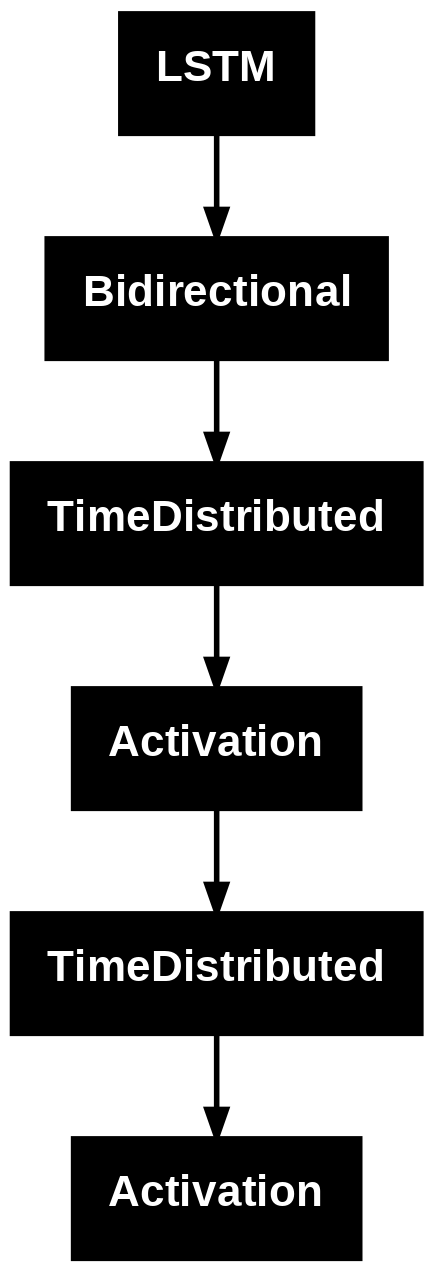

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model.png')

## 8. Tách dữ liệu thành tập training và validation

In [43]:
# Tách dữ liệu thành tập 80% training và 20% validation
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size= 0.2, random_state= 42)

In [44]:
# Chia tách dữ liệu để tránh tràn RAM
BATCH_SIZE = 512
EPOCHS = 10

def _generate_data(data, batch_size):
    current_index = 0
    while True:
        x, y = [], []
        for i in range(BATCH_SIZE):
            y.append(_encoder_data(data[current_index]))
            x.append(_encoder_data(_add_noise(data[current_index])))
            current_index += 1
            if current_index > len(data) -1:
                current_index= 0
        yield(np.array(x), np.array(y))

In [45]:
train_generate = _generate_data(train_data, batch_size= BATCH_SIZE)
validation_generate = _generate_data(valid_data, batch_size= BATCH_SIZE)

## 9. Huấn luyện mô hình

In [46]:
# Huấn luyện mô hình
M = model.fit(train_generate, epochs= EPOCHS,
                       steps_per_epoch = len(train_data) // BATCH_SIZE,
                       validation_data = validation_generate,
                       validation_steps= len(valid_data)// BATCH_SIZE)

Epoch 1/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 177s 291ms/step - accuracy: 0.6825 - loss: 1.5787 - val_accuracy: 0.9611 - val_loss: 0.1821
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 169s 289ms/step - accuracy: 0.9662 - loss: 0.1496 - val_accuracy: 0.9777 - val_loss: 0.0874
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 170s 290ms/step - accuracy: 0.9790 - loss: 0.0820 - val_accuracy: 0.9844 - val_loss: 0.0594
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 199s 340ms/step - accuracy: 0.9853 - loss: 0.0568 - val_accuracy: 0.9877 - val_loss: 0.0475
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 179s 305ms/step - accuracy: 0.9884 - loss: 0.0451 - val_accuracy: 0.9889 - val_loss: 0.0423
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 190s 324ms/step - accuracy: 0.9900 - loss: 0.0390 - val_accuracy: 0.9913 - val_loss: 0.0350
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 174s 296ms/step - accuracy: 0.9915 - loss: 0.0328 - val_accuracy: 0.9914 - val_loss: 0.0328
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 192s 327ms/step - accuracy: 0.9922 -

In [48]:
#Lưu mô hình
model.save('/content/drive/MyDrive/spellcheck_model.h5')